**unsupervised**
     

1.  projection
         Principal Component Analysis (PCA) 
             Incremental PCA 
             Kernelized PCA 
         selecting dimension?
            kaiser stoping rule
            scree test
            percentage of cummilative varience
        covarience-corelaton

2.   manifold Learning
              t-sne




In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/gdrive/My Drive/Colab_Notebooks/Data/SONAR.csv",header=None)

In [ ]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

In [ ]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

In [ ]:
y=data.pop(60)

In [ ]:
y.value_counts()

M    111
R     97
Name: 60, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
y=enc.fit_transform(y)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1.0000,0.9979,0.8297,0.7

In [ ]:
df=data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler(feature_range=(0, 1))
df=pd.DataFrame(scl.fit_transform(df))

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.204011,0.162180,0.139068,0.114342,0.173732,0.253615,0.320472,0.285114,0.252485,0.281652,0.293652,0.332094,0.366929,0.277682,0.318088,0.368702,0.394864,0.430980,0.479078,0.532370,0.587964,0.615862,0.625914,0.664639,0.667442,0.669420,0.687105,0.685080,0.636845,0.553561,0.497303,0.447810,0.388029,0.404911,0.378717,0.379887,0.359399,0.313359,0.304343,0.326260,0.293285,0.332959,0.318818,0.275799,0.280398,0.220284,0.221755,0.273807,0.262135,0.247564,0.160047,0.180031,0.265172,0.290669,0.197061,0.200555,0.213642,0.175035,0.216015,0.136425
std,0.169550,0.141277,0.126242,0.110623,0.140888,0.158843,0.167175,0.187767,0.175311,0.192215,0.188153,0.205264,0.202911,0.169614,0.206066,0.236770,0.273212,0.271719,0.271395,0.281092,0.271731,0.261612,0.265101,0.244971,0.250949,0.261293,0.258070,0.244122,0.243760,0.235165,0.233234,0.239538,0.216857,0.245089,0.265043,0.266251,0.262314,0.221455,0.209861,0.194620,0.198160,0.206017,0.179741,0.171722,0.215565,0.183678,0.157466,0.186932,0.181494,0.165637,0.119607,0.137432,0.183385,0.213474,0.160717,0.147080,0.164361,0.148051,0.170286,0.116190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087389,0.067938,0.057326,0.044163,0.079508,0.152714,0.209957,0.165215,0.132571,0.142964,0.142280,0.161013,0.212646,0.152496,0.162027,0.183289,0.177132,0.212545,0.262650,0.305035,0.367332,0.393646,0.417426,0.529480,0.514139,0.497935,0.508247,0.521176,0.455864,0.372963,0.324087,0.270726,0.220703,0.208135,0.160658,0.147530,0.136672,0.141390,0.144292,0.190359,0.147192,0.187179,0.200698,0.163457,0.134312,0.094007,0.116353,0.135145,0.133014,0.140000,0.083914,0.092368,0.118831,0.127924,0.080499,0.102564,0.096591,0.075515,0.098485,0.057737
50%,0.157080,0.129447,0.107753,0.090942,0.141517,0.220236,0.280438,0.235061,0.214349,0.244673,0.277754,0.330378,0.353462,0.261730,0.279466,0.293609,0.283390,0.343688,0.405586,0.510381,0.597070,0.657397,0.681784,0.691118,0.714242,0.729596,0.732745,0.724063,0.676136,0.581496,0.481907,0.437205,0.360706,0.349603,0.297075,0.315675,0.296523,0.285328,0.259751,0.290142,0.258830,0.292430,0.287793,0.228936,0.210407,0.166415,0.184082,0.233902,0.225644,0.216970,0.138446,0.151213,0.235065,0.242690,0.156463,0.165385,0.160511,0.125858,0.173554,0.108545
75%,0.251106,0.202958,0.185447,0.139563,0.237319,0.333042,0.407738,0.361852,0.334555,0.368082,0.386715,0.450835,0.479128,0.370089,0.451224,0.528725,0.647109,0.666545,0.717442,0.795939,0.807098,0.828213,0.839541,0.869045,0.870620,0.883027,0.912911,0.897360,0.849964,0.717881,0.647139,0.606493,0.533892,0.609353,0.584075,0.552949,0.528974,0.418270,0.419355,0.449510,0.407093,0.462332,0.419662,0.350103,0.329187,0.274787,0.279654,0.359689,0.3459

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.204011,0.162180,0.139068,0.114342,0.173732,0.253615,0.320472,0.285114,0.252485,0.281652,0.293652,0.332094,0.366929,0.277682,0.318088,0.368702,0.394864,0.430980,0.479078,0.532370,0.587964,0.615862,0.625914,0.664639,0.667442,0.669420,0.687105,0.685080,0.636845,0.553561,0.497303,0.447810,0.388029,0.404911,0.378717,0.379887,0.359399,0.313359,0.304343,0.326260,0.293285,0.332959,0.318818,0.275799,0.280398,0.220284,0.221755,0.273807,0.262135,0.247564,0.160047,0.180031,0.265172,0.290669,0.197061,0.200555,0.213642,0.175035,0.216015,0.136425
std,0.169550,0.141277,0.126242,0.110623,0.140888,0.158843,0.167175,0.187767,0.175311,0.192215,0.188153,0.205264,0.202911,0.169614,0.206066,0.236770,0.273212,0.271719,0.271395,0.281092,0.271731,0.261612,0.265101,0.244971,0.250949,0.261293,0.258070,0.244122,0.243760,0.235165,0.233234,0.239538,0.216857,0.245089,0.265043,0.266251,0.262314,0.221455,0.209861,0.194620,0.198160,0.206017,0.179741,0.171722,0.215565,0.183678,0.157466,0.186932,0.181494,0.165637,0.119607,0.137432,0.183385,0.213474,0.160717,0.147080,0.164361,0.148051,0.170286,0.116190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087389,0.067938,0.057326,0.044163,0.079508,0.152714,0.209957,0.165215,0.132571,0.142964,0.142280,0.161013,0.212646,0.152496,0.162027,0.183289,0.177132,0.212545,0.262650,0.305035,0.367332,0.393646,0.417426,0.529480,0.514139,0.497935,0.508247,0.521176,0.455864,0.372963,0.324087,0.270726,0.220703,0.208135,0.160658,0.147530,0.136672,0.141390,0.144292,0.190359,0.147192,0.187179,0.200698,0.163457,0.134312,0.094007,0.116353,0.135145,0.133014,0.140000,0.083914,0.092368,0.118831,0.127924,0.080499,0.102564,0.096591,0.075515,0.098485,0.057737
50%,0.157080,0.129447,0.107753,0.090942,0.141517,0.220236,0.280438,0.235061,0.214349,0.244673,0.277754,0.330378,0.353462,0.261730,0.279466,0.293609,0.283390,0.343688,0.405586,0.510381,0.597070,0.657397,0.681784,0.691118,0.714242,0.729596,0.732745,0.724063,0.676136,0.581496,0.481907,0.437205,0.360706,0.349603,0.297075,0.315675,0.296523,0.285328,0.259751,0.290142,0.258830,0.292430,0.287793,0.228936,0.210407,0.166415,0.184082,0.233902,0.225644,0.216970,0.138446,0.151213,0.235065,0.242690,0.156463,0.165385,0.160511,0.125858,0.173554,0.108545
75%,0.251106,0.202958,0.185447,0.139563,0.237319,0.333042,0.407738,0.361852,0.334555,0.368082,0.386715,0.450835,0.479128,0.370089,0.451224,0.528725,0.647109,0.666545,0.717442,0.795939,0.807098,0.828213,0.839541,0.869045,0.870620,0.883027,0.912911,0.897360,0.849964,0.717881,0.647139,0.606493,0.533892,0.609353,0.584075,0.552949,0.528974,0.418270,0.419355,0.449510,0.407093,0.462332,0.419662,0.350103,0.329187,0.274787,0.279654,0.359689,0.3459

In [ ]:
#sns.pairplot(df)

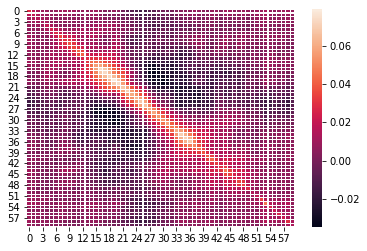

In [ ]:
sns.heatmap(df.cov(),linewidths=0.05)

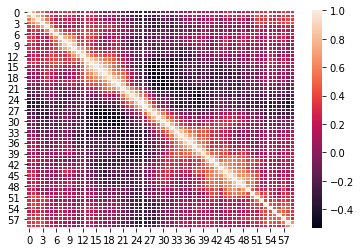

In [ ]:
sns.heatmap(df.corr(),linewidths=0.05)

# knowing the dimensions required

## kiser Stopping rule 
( Choose all components whose eigenvalues are greater than 1)

In [ ]:
df.shape

(208, 60)

In [ ]:
#m,n=np.linalg.eig(df)

## scree test


#   PCA

In [ ]:
from sklearn.decomposition import PCA
mod=PCA()
X_PCA=mod.fit_transform(df)

In [ ]:
X_PCA.shape

(208, 60)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


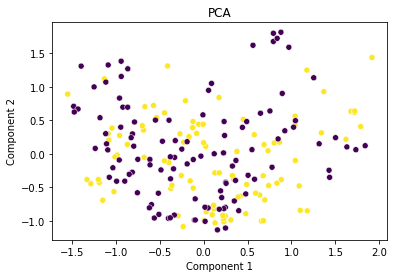

In [ ]:
plt.title("PCA") 
sns.scatterplot(X_PCA[:, 0], X_PCA[:, 1],c=y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show() 

## percentage of cummilative varience

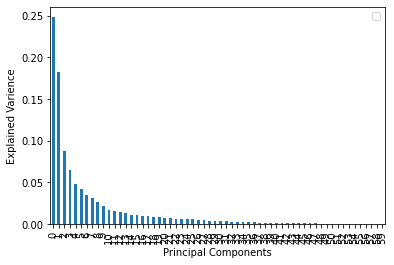

In [ ]:
pd.DataFrame(mod.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [ ]:
var=np.cumsum(np.round(mod.explained_variance_ratio_, decimals=3)*100)
var

array([ 24.9,  43.1,  51.9,  58.4,  63.2,  67.4,  70.9,  74. ,  76.7,
        78.9,  80.6,  82.2,  83.7,  85.1,  86.2,  87.3,  88.3,  89.2,
        90.1,  90.9,  91.7,  92.4,  93. ,  93.6,  94.2,  94.8,  95.3,
        95.8,  96.2,  96.6,  97. ,  97.3,  97.6,  97.9,  98.1,  98.3,
        98.5,  98.7,  98.9,  99.1,  99.2,  99.3,  99.4,  99.5,  99.6,
        99.7,  99.8,  99.9, 100. , 100.1, 100.2, 100.2, 100.2, 100.2,
       100.2, 100.2, 100.2, 100.2, 100.2, 100.2])

#   PCA

In [ ]:
from sklearn.decomposition import PCA
mod=PCA(n_components=3)
X_PCA=mod.fit_transform(df)

In [ ]:
X_PCA.shape

(208, 3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


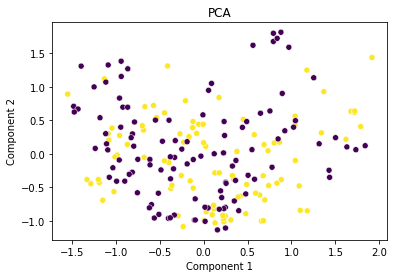

In [ ]:
plt.title("PCA") 
sns.scatterplot(X_PCA[:, 0], X_PCA[:, 1],c=y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show() 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


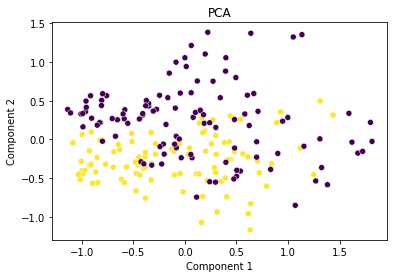

In [ ]:
plt.title("PCA") 
sns.scatterplot(X_PCA[:, 1], X_PCA[:, 2],c=y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show()

## percentage of cummilative varience

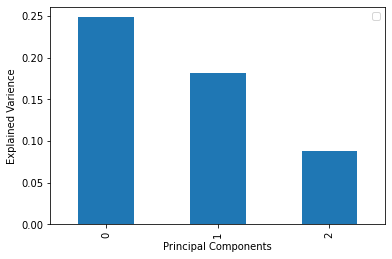

In [ ]:
pd.DataFrame(mod.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [ ]:
var=np.cumsum(np.round(mod.explained_variance_ratio_, decimals=3)*100)
var

array([24.9, 43.1, 51.9])

# Incrimental PCA

In [ ]:
 from sklearn.decomposition import IncrementalPCA

In [ ]:
Ipca=IncrementalPCA(n_components=3)
I_PCA=Ipca.fit_transform(df)

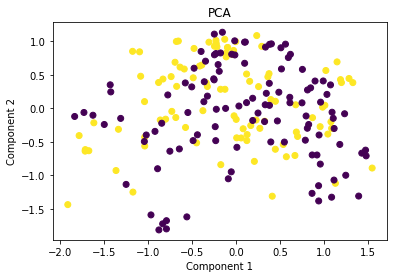

In [ ]:
plt.title("PCA") 
plt.scatter(I_PCA[:, 0], I_PCA[:, 1],c=y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show() 

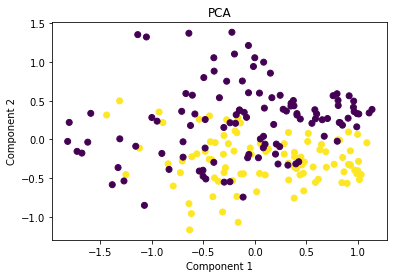

In [ ]:
plt.title("PCA") 
plt.scatter(I_PCA[:, 1], I_PCA[:, 2],c=y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show() 

## percentage of cummilative varience

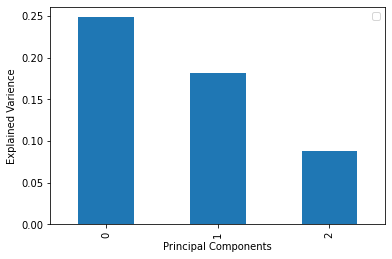

In [ ]:
pd.DataFrame(Ipca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [ ]:
var=np.cumsum(np.round(Ipca.explained_variance_ratio_, decimals=3)*100)
var

array([24.9, 43.1, 51.9])

# kernal PCA

In [ ]:
from sklearn.decomposition import KernelPCA 

In [ ]:
kpca = KernelPCA(n_components=3) 

In [ ]:
kpca.fit(df)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='linear',
          kernel_params=None, max_iter=None, n_components=3, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [ ]:
X_kpca = kpca.transform(df) 

In [ ]:
X_kpca.shape

(208, 3)

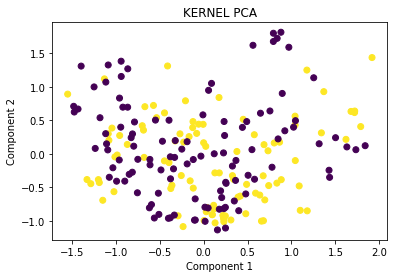

In [ ]:
plt.title("KERNEL PCA") 
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],c=y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show()


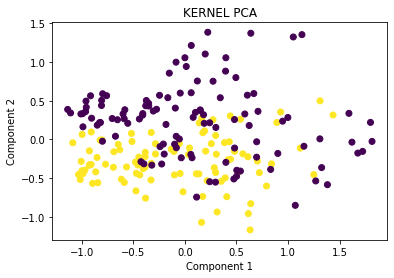

In [ ]:
plt.title("KERNEL PCA") 
plt.scatter(X_kpca[:, 1], X_kpca[:, 2],c=y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show()

# MANIFOLD LEARNING

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3,random_state=42)

In [ ]:
tsne_clu = tsne.fit_transform(df)

In [ ]:
tsne_clu.shape

(208, 3)

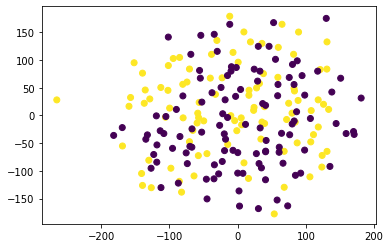

In [ ]:
plt.scatter(tsne_clu[:, 0], tsne_clu[:, 1],c=y)
plt.show()

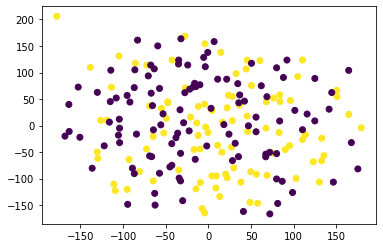

In [ ]:
plt.scatter(tsne_clu[:, 1], tsne_clu[:, 2],c=y)
plt.show()

# CLUSTRING


*  k-means, K-modes 
*  hirarical clustring



# K-means

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
kmeans=KMeans(n_clusters=2)

In [ ]:
p_Kmeans=kmeans.fit_transform(df)

In [ ]:
kmeans.cluster_centers_[0]

array([0.19016306, 0.14964836, 0.12093615, 0.09096793, 0.13346906,
       0.22565121, 0.29193222, 0.26685451, 0.23339558, 0.24545048,
       0.24356722, 0.27994062, 0.29123949, 0.19230652, 0.20853999,
       0.22952899, 0.21861676, 0.24054449, 0.28217851, 0.35184095,
       0.42211409, 0.4594414 , 0.50579967, 0.59540803, 0.64156611,
       0.68408068, 0.72386903, 0.77051122, 0.75706563, 0.68646256,
       0.62006661, 0.56339711, 0.49698294, 0.51548117, 0.48186503,
       0.47362138, 0.43587563, 0.37667961, 0.35587923, 0.36504781,
       0.34924296, 0.39460724, 0.37020394, 0.31297418, 0.32972388,
       0.26690208, 0.24981388, 0.30700587, 0.27949315, 0.25609428,
       0.16298694, 0.18054895, 0.25709476, 0.27355426, 0.19014025,
       0.19009972, 0.20893834, 0.16253496, 0.22107438, 0.13970148])

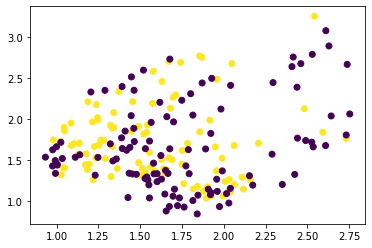

In [ ]:
plt.scatter(p_Kmeans[:, 0], p_Kmeans[:, 1],c=y)
plt.show()

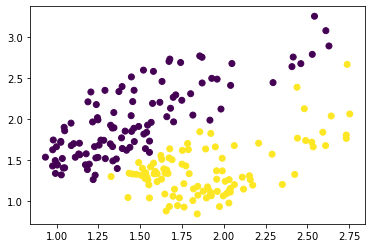

In [ ]:
plt.scatter(p_Kmeans[:, 0], p_Kmeans[:, 1],c=kmeans.labels_)
plt.show()

In [ ]:
pred=kmeans.labels_

In [ ]:
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y,pred))
print(classification_report(y,pred))

[[52 59]
 [56 41]]
              precision    recall  f1-score   support

           0       0.48      0.47      0.47       111
           1       0.41      0.42      0.42        97

    accuracy                           0.45       208
   macro avg       0.45      0.45      0.45       208
weighted avg       0.45      0.45      0.45       208



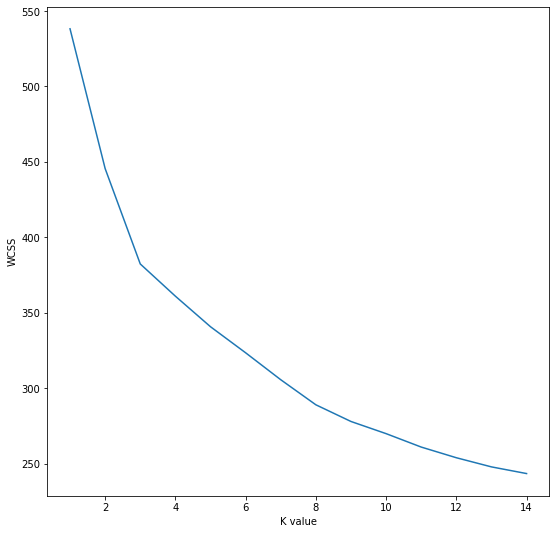

In [ ]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (9, 9))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Elbow point starting from 2 
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_transform(df)

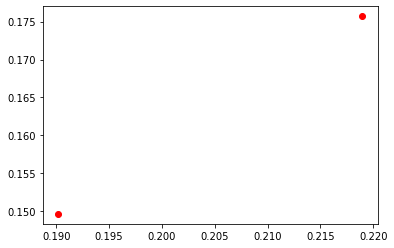

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)

# Silhouette Index

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.
0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.
-1 Score minus -1 Silhouette score indicates that the samples have been assigned to the wrong clusters.


In [ ]:
no_of_clusters = range(2,10-1)
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(df) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(df, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.1573450799564802
For no of clusters = 3  The average silhouette_score is : 0.15901239502019873
For no of clusters = 4  The average silhouette_score is : 0.1327479593202382
For no of clusters = 5  The average silhouette_score is : 0.1401808549577651
For no of clusters = 6  The average silhouette_score is : 0.13608166802623053
For no of clusters = 7  The average silhouette_score is : 0.11618040417388699
For no of clusters = 8  The average silhouette_score is : 0.14597784026202965


In [ ]:
from sklearn.metrics import silhouette_score 
print(silhouette_score(df,kmeans.labels_)) 

0.15791815173046314


# Davies–Bouldin index (DBI)


Lower the DB index value, better is the clustering. It also has a drawback. A good value reported by this method does not imply the best information retrieval

In [ ]:
from sklearn.metrics import davies_bouldin_score 
print(davies_bouldin_score(df,kmeans.labels_)) 

2.119624023180547


# Calinski-Harabasz Index


Higher value of CH index means the clusters are dense and well separated

In [ ]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(df,kmeans.labels_)) 

42.80637060580673


# K-modes

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=2)
pred= km.fit_predict(df)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=uint16)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pred,y))
print(classification_report(pred,y))

[[97 87]
 [14 10]]
              precision    recall  f1-score   support

           0       0.87      0.53      0.66       184
           1       0.10      0.42      0.17        24

    accuracy                           0.51       208
   macro avg       0.49      0.47      0.41       208
weighted avg       0.78      0.51      0.60       208



# hirarical clustring

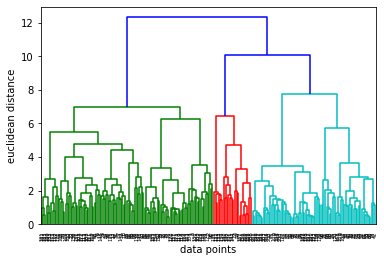

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
pred = hc.fit_predict(df)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pred,y))
print(classification_report(pred,y))

[[52 49]
 [59 48]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       101
           1       0.49      0.45      0.47       107

    accuracy                           0.48       208
   macro avg       0.48      0.48      0.48       208
weighted avg       0.48      0.48      0.48       208

